# Medical Cost Insurance PROJECT

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from matplotlib.pyplot import style
import pickle
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# for mising values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

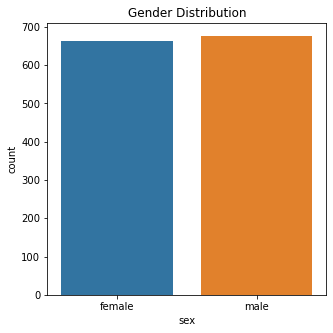

In [12]:
# visual represntation of data
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data)
plt.title('Gender Distribution')
plt.show()

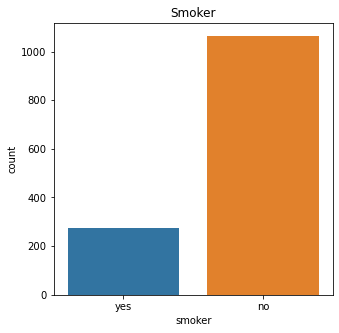

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data)
plt.title('Smoker')
plt.show()

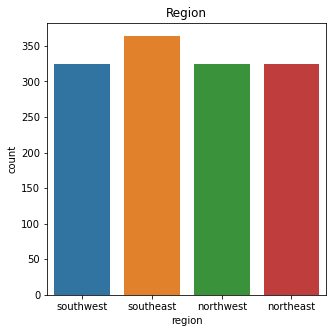

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

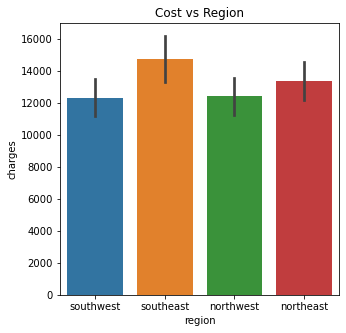

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=data)
plt.title('Cost vs Region')
plt.show()

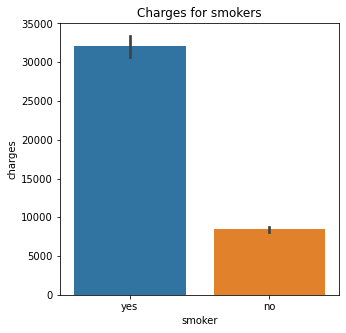

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker', y='charges', data=data)
plt.title('Charges for smokers')
plt.show()

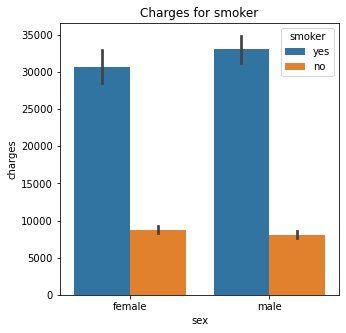

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges', hue= 'smoker', data=data)
plt.title('Charges for smoker')
plt.show()

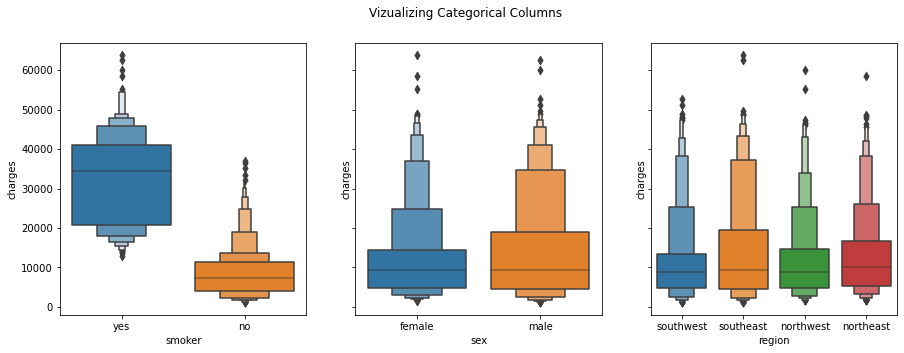

In [25]:
fig, axes =plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Vizualizing Categorical Columns')
sns.boxenplot(x='smoker', y='charges', data=data, ax=axes[0])
sns.boxenplot(x='sex', y='charges', data=data, ax=axes[1])
sns.boxenplot(x='region', y='charges', data=data, ax=axes[2])
plt.show()

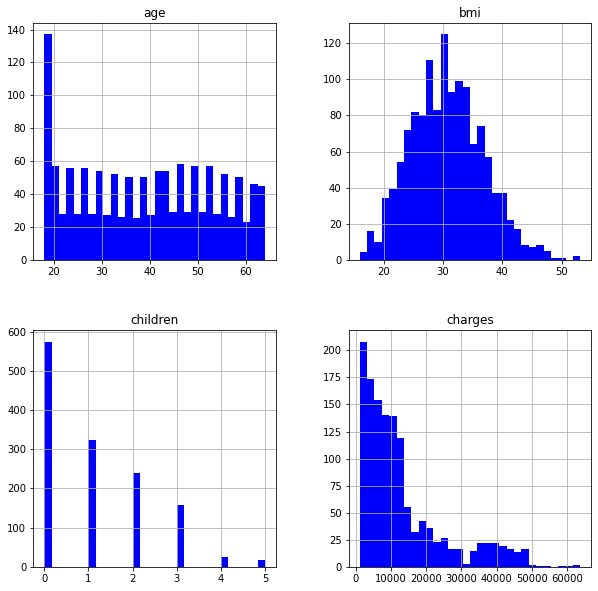

In [30]:
data[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10,10), color= 'blue')
plt.show()

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# converting categorical data into numerical data
data['sex']= data['sex'].apply({'male':0, 'female':1}.get)
data['smoker']= data['smoker'].apply({'yes':1, 'no':0}.get)
data['region']= data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [35]:
# update data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


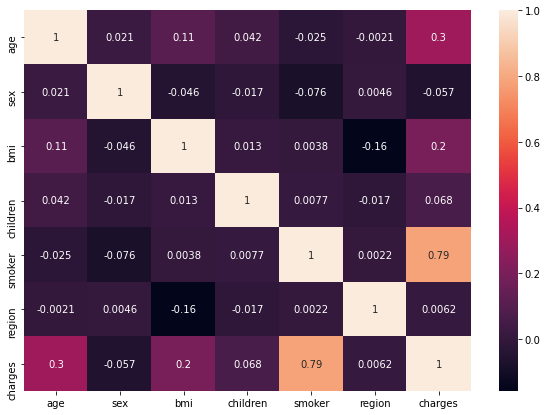

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [39]:
X=data.drop(['charges','sex'], axis=1)
y=data.charges

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
print("X_train shape:",  X_train.shape)
print("X_test shape:",  X_test.shape)
print("y_train shape:",  y_train.shape)
print("y_test shape:",  y_test.shape)


X_train shape: (936, 5)
X_test shape: (402, 5)
y_train shape: (936,)
y_test shape: (402,)


In [42]:
linreg= LinearRegression()

In [43]:
linreg.fit(X_train, y_train)
pred=linreg.predict(X_test)

In [45]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7697211527941855


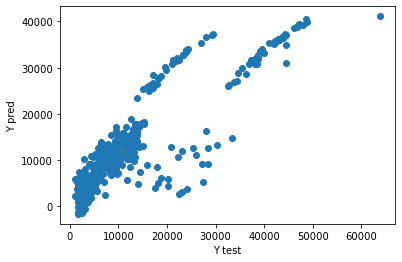

In [46]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [53]:
# checking the medical insurance cost for a non-smoker
data1= {'age': 50, 'bmi': 25, 'children': 2, 'smoker': 0, 'region':2}
index= [0]
cust_data= pd.DataFrame(data1, index)
cust_data

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [54]:
cost_pred = linreg.predict(cust_data)
print("The medical insurance cost of non-smoker is: ", cost_pred)

The medical insurance cost of non-smoker is:  [9579.86504857]


In [55]:
# checking the medical insurance cost for a smoker
data2= {'age': 50, 'bmi': 25, 'children': 2, 'smoker': 1, 'region':2}
index= [0]
cust_data= pd.DataFrame(data2, index)
cust_data

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [56]:
cost_pred = linreg.predict(cust_data)
print("The medical insurance cost of smoker is: ", cost_pred)

The medical insurance cost of smoker is:  [33206.92756082]
